In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [33]:
df = pd.read_csv("Mumbai.csv")
df.head()


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


## <center> Exploratory Data Analysis

In [51]:
print("Shape:", df.shape)
print("\nMissing values (top 20):")
print(df.isna().sum().sort_values(ascending=False).head(20))
print("\nNumeric summary:")
display(df.describe().T)

Shape: (7719, 40)

Missing values (top 20):
Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
dtype: int64

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
Price,7719.0,1.506165e+07,2.052100e+07,2000000.0,5300000.0,9500000.0,17000000.0,420000000.0
Area,7719.0,9.984092e+02,5.509678e+02,200.0,650.0,900.0,1177.0,8511.0
No. of Bedrooms,7719.0,1.913331e+00,8.553763e-01,1.0,1.0,2.0,2.0,7.0
Resale,7719.0,6.471045e-01,4.779015e-01,0.0,0.0,1.0,1.0,1.0
MaintenanceStaff,7719.0,7.498899e+00,3.197923e+00,0.0,9.0,9.0,9.0,9.0
Gymnasium,7719.0,7.473896e+00,3.252095e+00,0.0,9.0,9.0,9.0,9.0
SwimmingPool,7719.0,7.437881e+00,3.328245e+00,0.0,9.0,9.0,9.0,9.0
LandscapedGardens,7719.0,7.441638e+00,3.320401e+00,0.0,9.0,9.0,9.0,9.0
JoggingTrack,7719.0,7.439435e+00,3.325002e+00,0.0,9.0,9.0,9.0,9.0
RainWaterHarvesting,7719.0,7.477005e+00,3.245418e+00,0.0,9.0,9.0,9.0,9.0


In [ ]:
possible_target_names = [
    'SalePrice','Sale_Price','Sale price','SalePriceINR','Price','price',
    'SalePrice_Rs','TotalPrice','sale_price','Selling_Price','SellingPrice'
]
target_col = None
for c in possible_target_names:
    if c in df.columns:
        target_col = c
        break
if target_col is None:
    for c in df.columns:
        if 'price' in c.lower():
            target_col = c
            break
if target_col is None:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) == 0:
        raise ValueError("No numeric columns found to use as target.")
    # pick the numeric column with largest variance as fallback
    target_col = df[numeric_cols].var().sort_values(ascending=False).index[0]
print("Detected target column:", target_col)


possible_area_names = ['Area','area','LotArea','Lot Area','TotalArea','BuiltArea','CarpetArea','area_sqft','super_area','SuperArea']
area_col = None
for c in possible_area_names:
    if c in df.columns:
        area_col = c
        break
if area_col is None:
    for c in df.columns:
        if 'area' in c.lower():
            area_col = c
            break
print("Detected area column (for simple linear regression):", area_col)

In [ ]:

data = df.copy().dropna(subset=[target_col])  
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_features:
    numeric_features.remove(target_col)

if len(numeric_features) > 15:
    numeric_features = list(data[numeric_features].var().sort_values(ascending=False).head(15).index)

categorical_features = data.select_dtypes(include=['object','category']).columns.tolist()

print("Using numeric features:", numeric_features)
print("Using categorical features:", categorical_features)



Using numeric features: ['Area', 'Microwave', 'WashingMachine', 'DiningTable', 'Sofa', 'Stadium', 'TV', 'GolfCourse', 'AC', 'Wardrobe', 'Wifi', 'Gasconnection', 'SportsFacility', 'Cafeteria', 'Hospital']
Using categorical features: ['Location']


In [ ]:

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')
    

In [48]:
# 7) Train/test split
X = data[numeric_features + categorical_features].copy()
y = data[target_col].astype(float).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # compatible with all sklearn versions
    mae = mean_absolute_error(y_test, preds)
    return {"model": name, "r2": r2, "rmse": rmse, "mae": mae}


results = []

## <center> Models Implements

### 1) Simple Regression

In [ ]:
if area_col and area_col in data.columns:
    X_area = data[[area_col]].copy()
    y_area = data[target_col].astype(float).copy()
    Xtr_a, Xte_a, ytr_a, yte_a = train_test_split(X_area, y_area, test_size=0.20, random_state=42)
    lr_area = LinearRegression(); 
    lr_area.fit(Xtr_a, ytr_a)
    results.append(evaluate_model(f"SimpleLinear_{area_col}", lr_area, Xte_a, yte_a))
else:
    print("Area column not found -> skipping simple linear regression")
    results.append({"model":"SimpleLinear_missing","r2":np.nan,"rmse":np.nan,"mae":np.nan})



### 2) Multiple Regression

In [ ]:
pipe_lr = Pipeline([('pre', preprocessor), ('reg', LinearRegression())])
pipe_lr.fit(X_train, y_train)
results.append(evaluate_model("MultipleLinear_noPCA", pipe_lr, X_test, y_test))


### 3) PCA

In [ ]:
n_components = min(10, len(numeric_features))
pca = PCA(n_components=min(0.95, n_components) if len(numeric_features)>0 else None)

try:
    num_pca_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler()), ('pca', pca)])
    pre_pca = ColumnTransformer([('num', num_pca_pipeline, numeric_features),
                                ('cat', categorical_transformer, categorical_features)], remainder='drop')
    pipe_pca_lr = Pipeline([('pre', pre_pca), ('reg', LinearRegression())])
    pipe_pca_lr.fit(X_train, y_train)
    results.append(evaluate_model("PCA_Linear", pipe_pca_lr, X_test, y_test))
except Exception as e:
    print("PCA path skipped due to:", e)
    results.append({"model":"PCA_Linear_error","r2":np.nan,"rmse":np.nan,"mae":np.nan})


### 4) Lasso & Ridge Regression

In [ ]:
pipe_lasso = Pipeline([('pre', preprocessor), ('lasso', Lasso(max_iter=5000))])
pipe_ridge = Pipeline([('pre', preprocessor), ('ridge', Ridge(max_iter=5000))])
lasso_gs = GridSearchCV(pipe_lasso, {'lasso__alpha':[0.001,0.01,0.1,1]}, cv=3, scoring='r2', n_jobs=-1)
ridge_gs = GridSearchCV(pipe_ridge, {'ridge__alpha':[0.001,0.01,0.1,1,10]}, cv=3, scoring='r2', n_jobs=-1)
lasso_gs.fit(X_train, y_train)
ridge_gs.fit(X_train, y_train)
results.append(evaluate_model("Lasso", lasso_gs, X_test, y_test))
results.append(evaluate_model("Ridge", ridge_gs, X_test, y_test))



Running Lasso & Ridge small grid...


/home/petpooja/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.465e+17, tolerance: 1.936e+14
  model = cd_fast.enet_coordinate_descent(
/home/petpooja/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.465e+17, tolerance: 1.936e+14
  model = cd_fast.enet_coordinate_descent(
/home/petpooja/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

### 5) SVR

In [ ]:
pipe_svr = Pipeline([('pre', preprocessor), ('svr', SVR())])
svr_param = {'svr__C':[0.1,1,10], 'svr__gamma':['scale','auto'], 'svr__epsilon':[0.01,0.1]}
svr_gs = GridSearchCV(pipe_svr, svr_param, cv=3, scoring='r2', n_jobs=-1)
svr_gs.fit(X_train, y_train)
results.append(evaluate_model("SVR_tuned", svr_gs, X_test, y_test))



Running SVR grid (small)...


### 6) Dicision Tree

In [ ]:
pipe_dt = Pipeline([('pre', preprocessor), ('dt', DecisionTreeRegressor(random_state=42))])
dt_gs = GridSearchCV(pipe_dt, {'dt__max_depth':[3,6,None], 'dt__min_samples_leaf':[1,3]}, cv=3, scoring='r2', n_jobs=-1)
dt_gs.fit(X_train, y_train)
results.append(evaluate_model("DecisionTree_tuned", dt_gs, X_test, y_test))


Running Decision Tree grid (small)...


### 7) Random Forest

In [ ]:

pipe_rf = Pipeline([('pre', preprocessor), ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))])
rf_gs = GridSearchCV(pipe_rf, {'rf__n_estimators':[50,100], 'rf__max_depth':[5,10,None]}, cv=3, scoring='r2', n_jobs=-1)
rf_gs.fit(X_train, y_train)
results.append(evaluate_model("RandomForest_tuned", rf_gs, X_test, y_test))

Running Random Forest grid (small)...


## <center> Compare Models R2 Score


Model comparison (sorted by R2 on test set):


,model,r2,rmse,mae
0,PCA_Linear,0.170675,1.998832e+07,9.330817e+06
1,MultipleLinear_noPCA,0.167590,2.002546e+07,9.450303e+06
2,Lasso,0.162808,2.008290e+07,9.421866e+06
3,Ridge,0.151294,2.022054e+07,9.570656e+06
4,RandomForest_tuned,0.104664,2.076858e+07,1.013066e+07
5,SimpleLinear_Area,0.073506,2.112688e+07,1.062269e+07
6,DecisionTree_tuned,0.041564,2.148798e+07,1.084302e+07
7,SVR_tuned,-0.084397,2.285642e+07,1.020636e+07


Saved results CSV: model_results_summary.csv


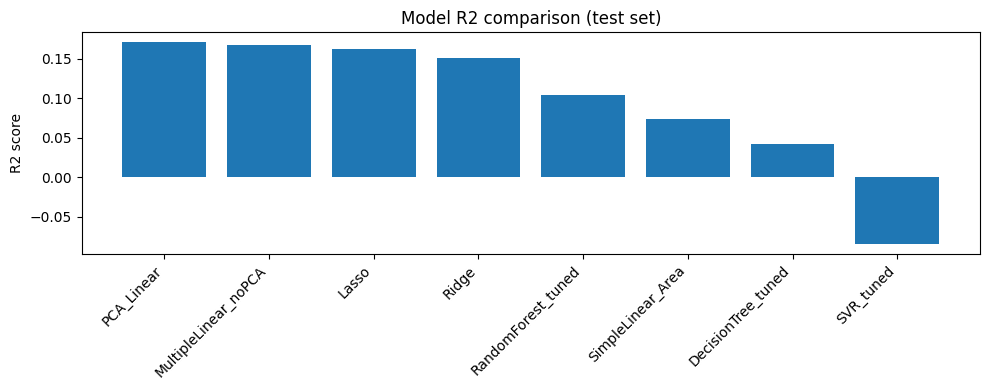

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='r2', ascending=False).reset_index(drop=True)
print("\nModel comparison (sorted by R2 on test set):")
display(results_df)

# Plot R2 comparison
plt.figure(figsize=(10,4))
plt.bar(results_df['model'], results_df['r2'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('R2 score')
plt.title('Model R2 comparison (test set)')
plt.tight_layout()
plt.show()

In [55]:
best = results_df.loc[0]
print("Best model on test set:", best['model'])
print("R2: {:.4f}, \nRMSE: {:.4f}, \nMAE: {:.4f}".format(best['r2'], best['rmse'], best['mae']))

Best model on test set: PCA_Linear
R2: 0.1707, 
RMSE: 19988324.7822, 
MAE: 9330816.9030
